In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Business/Project Understanding

- Explain project's background and requirement.

### Objective: 

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

### Tentang Organisasi:

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

 

### Permasalahan:

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

 
### Penjelasan kolom fitur:

- <b>Negara</b> : Nama negara
- <b>Kematian_anak</b> : Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- <b>Ekspor</b> : Ekspor barang dan jasa perkapita
- <b>Kesehatan</b> : Total pengeluaran kesehatan perkapita
- <b>Impor</b> : Impor barang dan jasa perkapita
- <b>Pendapatan</b> : Penghasilan bersih perorang
- <b>Inflasi</b> : Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- <b>Harapan_hidup</b> : Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- <b>Jumlah_fertiliti</b> : Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- <b>GDPperkapita</b> : GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

---
---
---

## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

In [7]:
df = pd.read_csv('/content/Data_Negara_HELP (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<ul style="list-style-type:square;">
    <li style="color:red;">Fitur/variable yang tersedia ada : Negara, Kematian_anak, Ekspor, Kesehatan, Impor, Pendapatan, Inflasi, Harapan_hidup, Jumlah_fertiliti, GDPperkapita
    </li>
</ul> 

In [8]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<ul style="list-style-type:square;">
    <li style="color:red;">
        # Ada 167 Rows, dan 10 columns
    </li>
</ul> 

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.

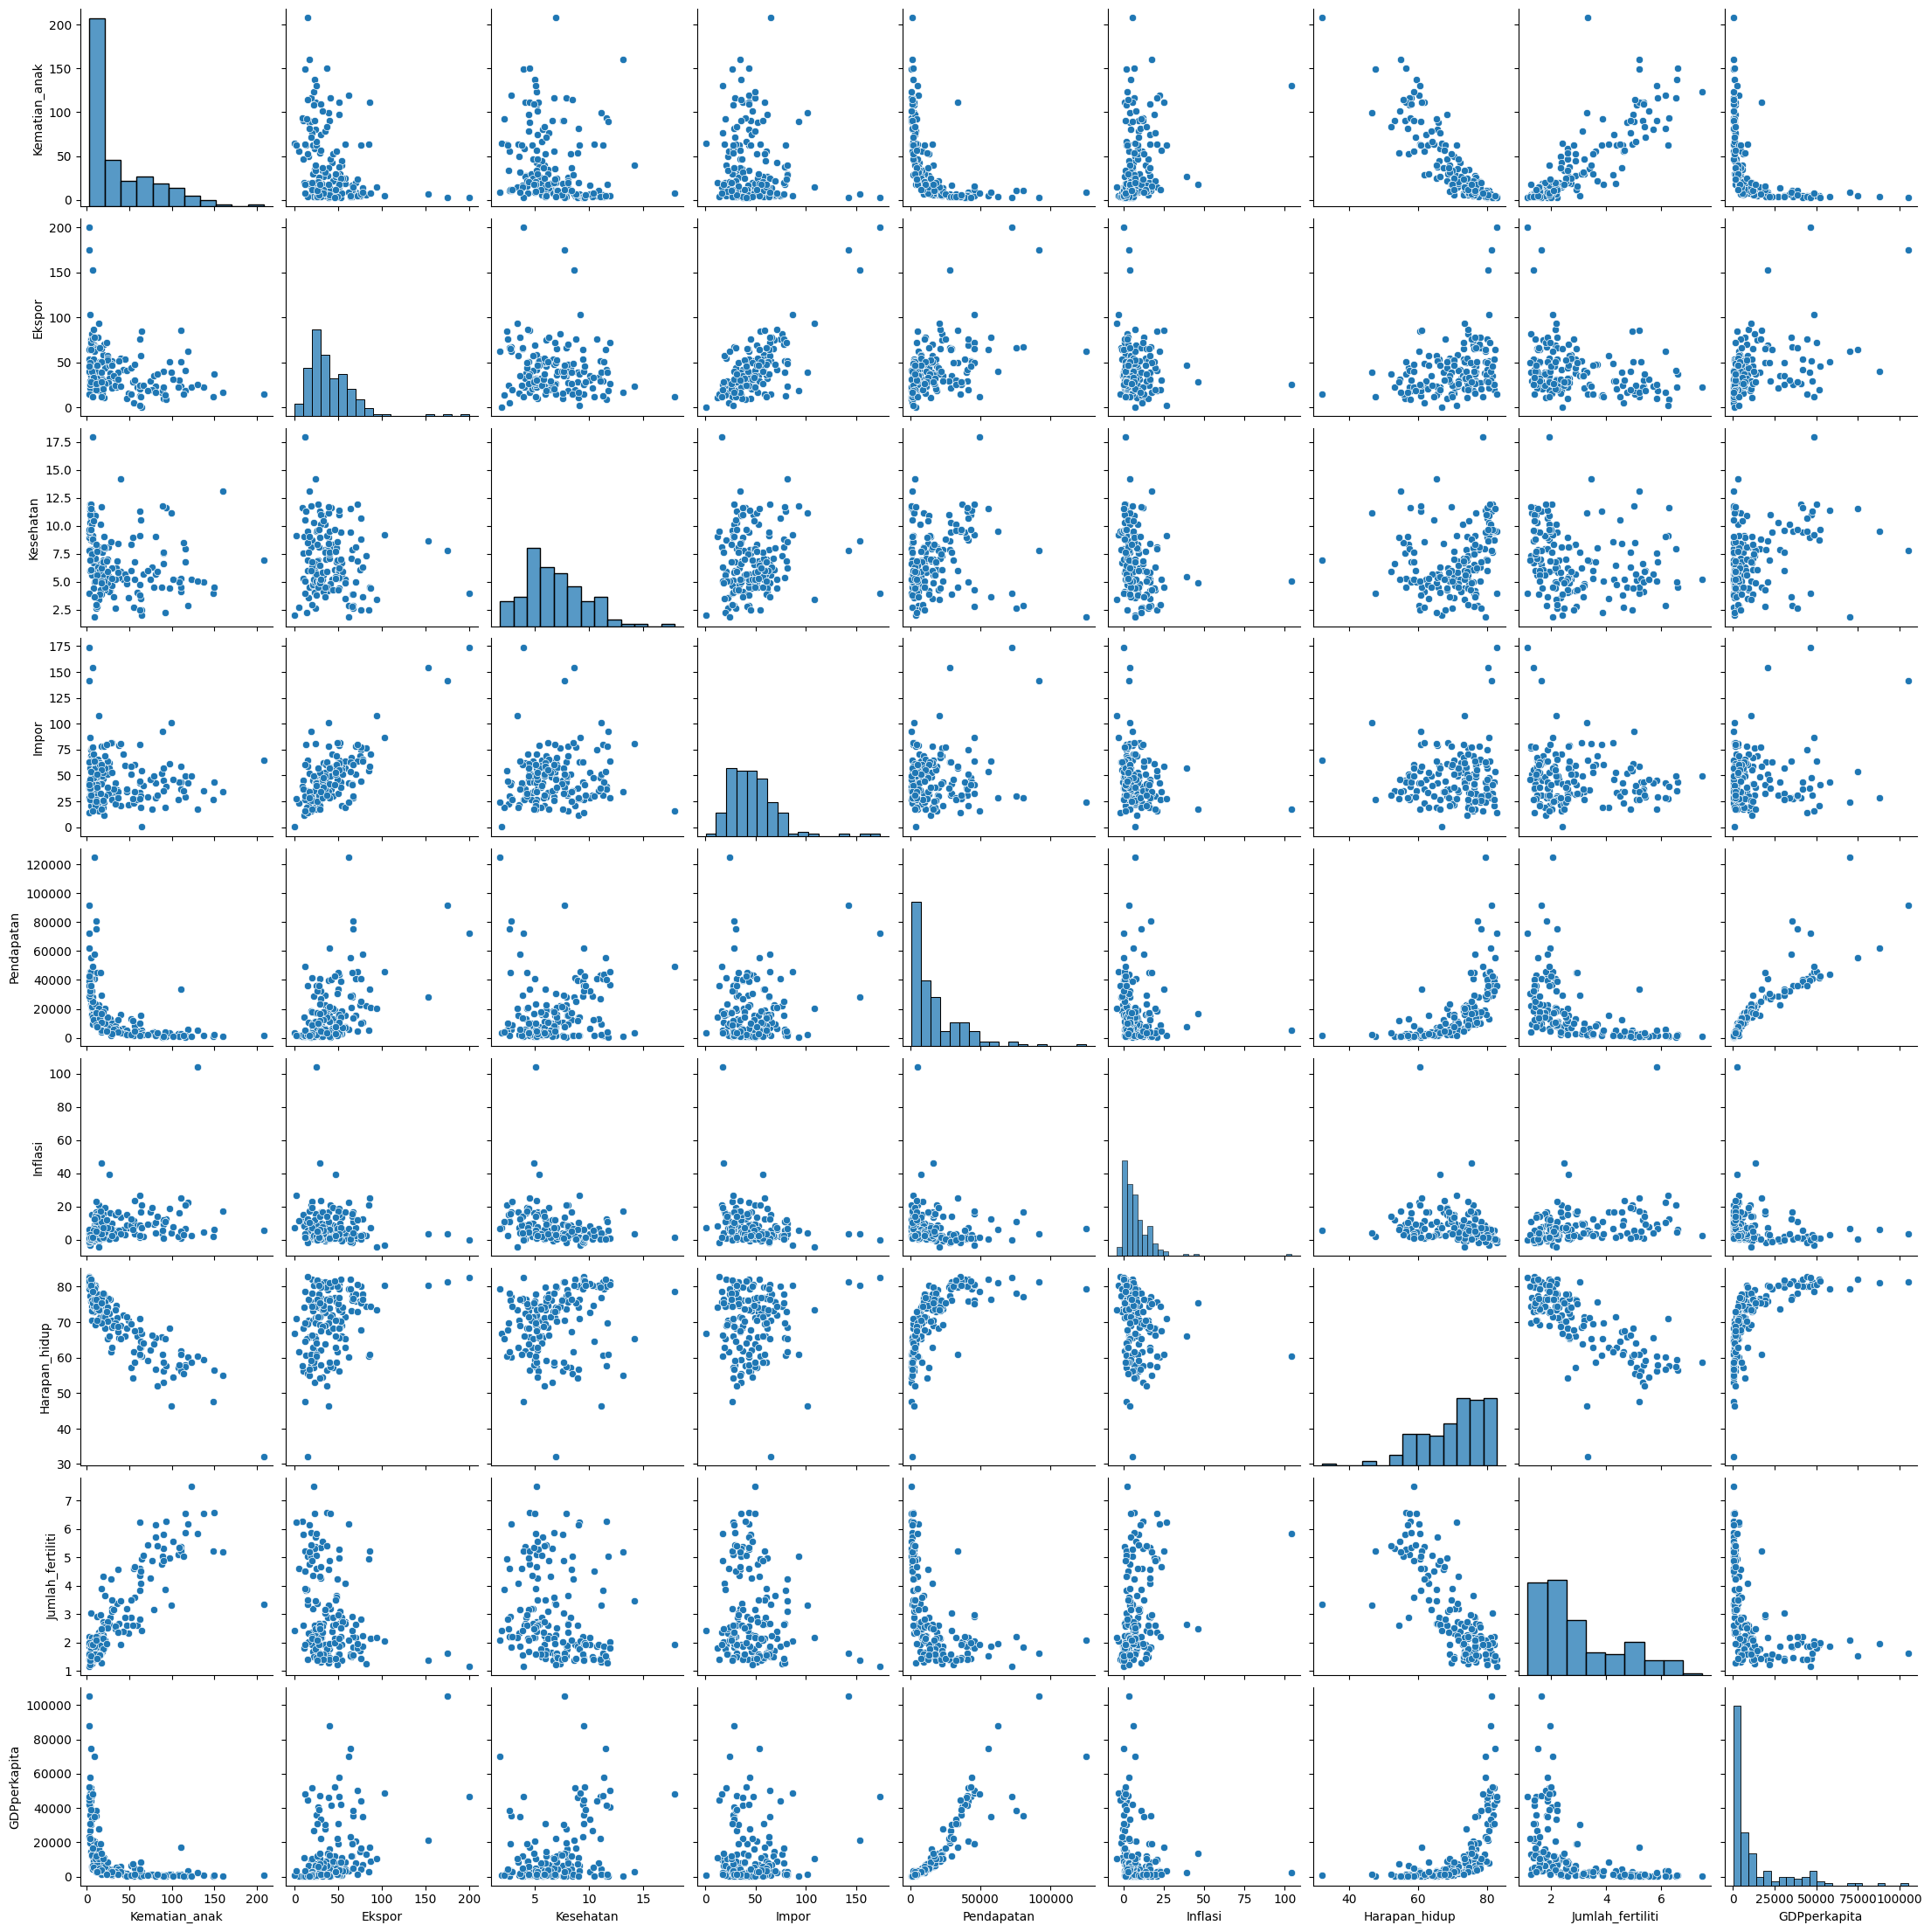

In [9]:
# df_fitur = df[['GDPperkapita','Kematian_anak','Kesehatan','Impor','Ekspor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti']]
sns.pairplot(data=df)

<ipython-input-10-28702bbbcd2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g')


<Axes: >

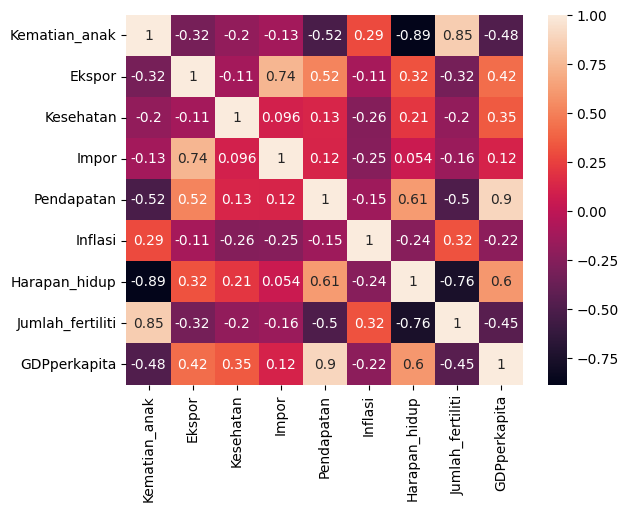

In [10]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')

### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    


In [11]:
df_2fitur = df[['Kematian_anak','GDPperkapita']]
df_2fitur

,Kematian_anak,GDPperkapita
0,90.2,553
1,16.6,4090
2,27.3,4460
3,119.0,3530
4,10.3,12200
...,...,...
162,29.2,2970
163,17.1,13500
164,23.3,1310
165,56.3,1310


<p style="color:red;"># Alasan saya memilih kedua fitur ini adalah karena keduanya merupakan faktor penting dalam menentukan pembangunan negara secara keseluruhan. Kematian anak di bawah usia 5 tahun dapat memberikan gambaran tentang tingkat kesehatan dan kesejahteraan masyarakat suatu negara. Semakin tinggi angka kematian anak, semakin rendah tingkat kesehatan dan kesejahteraan masyarakat negara tersebut. Sementara itu, GDP per kapita dapat memberikan gambaran tentang tingkat kemakmuran ekonomi suatu negara. Semakin tinggi GDP per kapita, semakin besar kemungkinan negara tersebut memiliki tingkat pembangunan kesahatan yang baik.</p>

### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.

In [12]:
df_2fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kematian_anak  167 non-null    float64
 1   GDPperkapita   167 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [13]:
df_2fitur.isnull().sum()

Kematian_anak    0
GDPperkapita     0
dtype: int64

In [14]:
df_2fitur.describe()

,Kematian_anak,GDPperkapita
count,167.000000,167.000000
mean,38.270060,12964.155689
std,40.328931,18328.704809
min,2.600000,231.000000
25%,8.250000,1330.000000
50%,19.300000,4660.000000
75%,62.100000,14050.000000
max,208.000000,105000.000000


<p style="color:red;"># Tidak terdapat Missing Value, saya mengecek melalui dengan sintax info(),isnull.sum(), dan describe()</p>

2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.

<Axes: xlabel='Kematian_anak'>

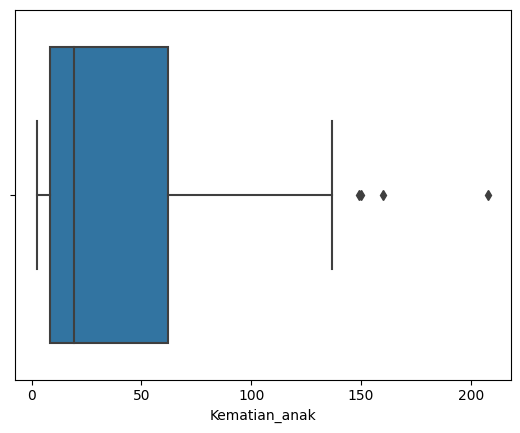

In [15]:
sns.boxplot(x='Kematian_anak', data=df_2fitur )

<Axes: xlabel='GDPperkapita'>

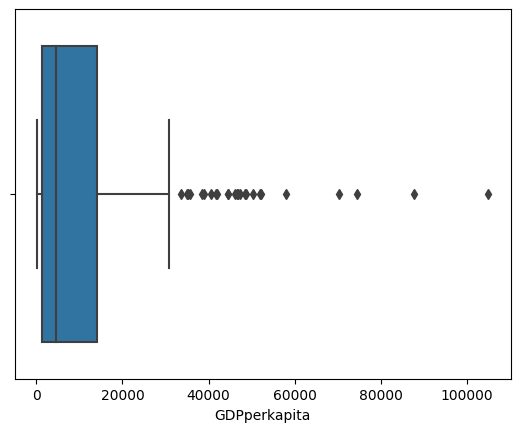

In [16]:
sns.boxplot(x='GDPperkapita', data=df_2fitur)

<p style="color:red;"># Terdapat Outlier/Pencilan pada data tersebut pada fitur/variable "Kematian Anak" dan "GDPperkapita"</p>

In [17]:
def finding_outlier_IQR(df_2fitur):
    Q1 = df_2fitur.quantile(0.25)
    Q3 = df_2fitur.quantile(0.75)
    IQR = Q3 - Q1
    df_result = df_2fitur[( (df_2fitur>(Q3+1.5*IQR)) | (df_2fitur<(Q1-1.5*IQR)) )]
    return df_result

In [18]:
print(finding_outlier_IQR(df_2fitur['Kematian_anak']))
print(finding_outlier_IQR(df_2fitur['GDPperkapita']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64


In [19]:
def remove_outlier_IQR(df_2fitur):
    Q1 = df_2fitur.quantile(0.25)
    Q3 = df_2fitur.quantile(0.75)
    IQR = Q3 - Q1
    df_result = df_2fitur[ ~( (df_2fitur>(Q3+1.5*IQR)) | (df_2fitur<(Q1-1.5*IQR)) )]
    return df_result

In [20]:
df_outlier_removed = remove_outlier_IQR(df_2fitur[['Kematian_anak','GDPperkapita']])
df_outlier_removed.dropna(axis=0, inplace=True)

<Axes: xlabel='Kematian_anak'>

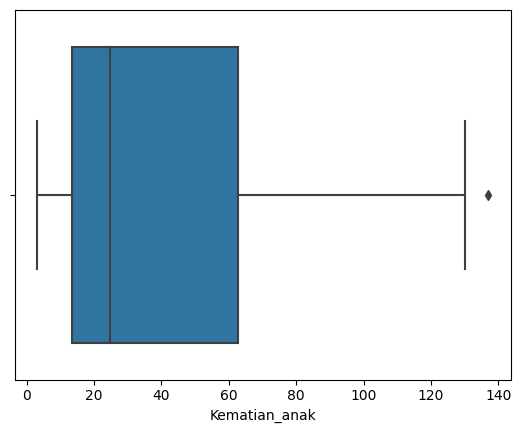

In [21]:
sns.boxplot(x='Kematian_anak', data=df_outlier_removed )

<Axes: xlabel='GDPperkapita'>

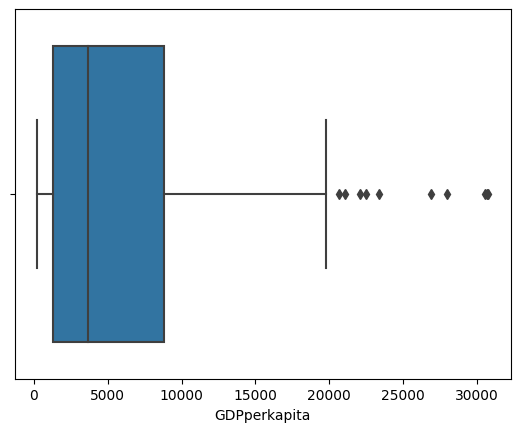

In [22]:
sns.boxplot(x='GDPperkapita', data=df_outlier_removed )

In [23]:
print(finding_outlier_IQR(df_outlier_removed['Kematian_anak']))
print(finding_outlier_IQR(df_outlier_removed['GDPperkapita']))

97    137.0
Name: Kematian_anak, dtype: float64
10     28000.0
11     20700.0
42     30800.0
60     26900.0
74     30600.0
98     21100.0
122    22500.0
135    23400.0
138    22100.0
139    30700.0
Name: GDPperkapita, dtype: float64


<p style="color:red;"># Saya ingin menghilangkan Outlier/pencilan yang ada pada boxplot dengan Inter Quartil Range(IQR), akan tetapi masih terdapat outlier. berarti saya harus menggunakan cara lain untuk menghilangkan outlier tersebut</p>

In [24]:
df_2fitur

,Kematian_anak,GDPperkapita
0,90.2,553
1,16.6,4090
2,27.3,4460
3,119.0,3530
4,10.3,12200
...,...,...
162,29.2,2970
163,17.1,13500
164,23.3,1310
165,56.3,1310


<Axes: xlabel='Kematian_anak'>

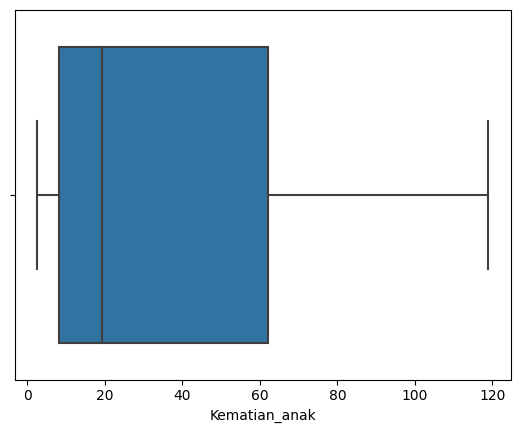

In [25]:
import warnings
warnings.filterwarnings('ignore')

mean = df_2fitur['Kematian_anak'].mean()
batas_atas = mean + (2 * df_2fitur['Kematian_anak'].std())
batas_bawah = mean - (2 * df_2fitur['Kematian_anak'].std())
df_2fitur.loc[df_2fitur['Kematian_anak'] > batas_atas, 'Kematian_anak'] = batas_atas
df_2fitur.loc[df_2fitur['Kematian_anak'] < batas_bawah, 'Kematian_anak'] = batas_bawah
sns.boxplot(x=df_2fitur['Kematian_anak'])

<p style="color:red;"># Pada akhirnya saya menemukan cara untuk menghilangkan outlier/pencilan di fitur 'Kematian Anak' dengan menggunakan Capping menggunakan nilai mean, disini outlier/pencilan dapat teratasi</p>

<Axes: xlabel='GDPperkapita'>

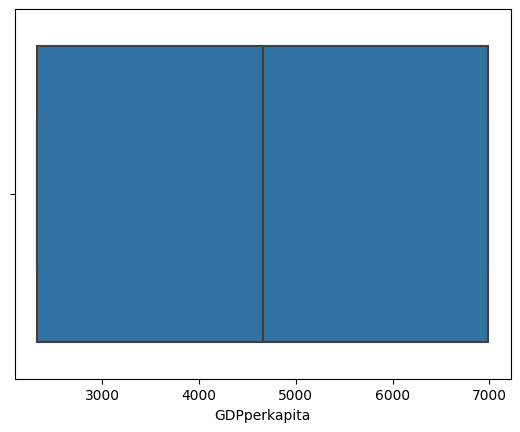

In [26]:
median = df_2fitur['GDPperkapita'].median()

df_2fitur.loc[df_2fitur['GDPperkapita'] > 1.5 * median, 'GDPperkapita'] = 1.5 * median
df_2fitur.loc[df_2fitur['GDPperkapita'] < 0.5 * median, 'GDPperkapita'] = 0.5 * median
sns.boxplot(x=df_2fitur['GDPperkapita'])

<p style="color:red;"># Pada akhirnya saya menemukan cara untuk menghilangkan outlier/pencilan di fitur 'GDPperkapita' dengan menggunakan Capping menggunakan nilai median, disini outlier/pencilan dapat teratasi</p>

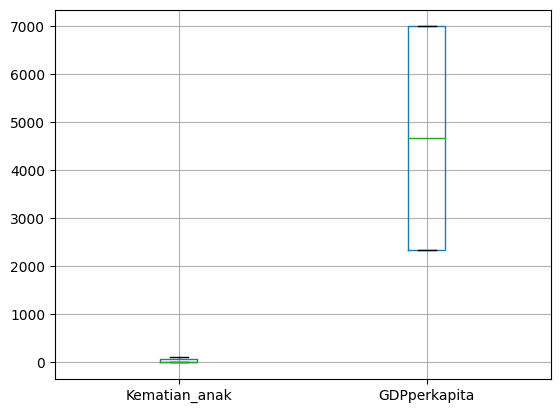

In [27]:
df_2fitur[['Kematian_anak','GDPperkapita']].boxplot()
plt.show()

### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

In [28]:
df_2fitur[['Kematian_anak']].mean()

Kematian_anak    36.92529
dtype: float64

In [29]:
df_2fitur[['GDPperkapita']].mean()

GDPperkapita    4778.263473
dtype: float64

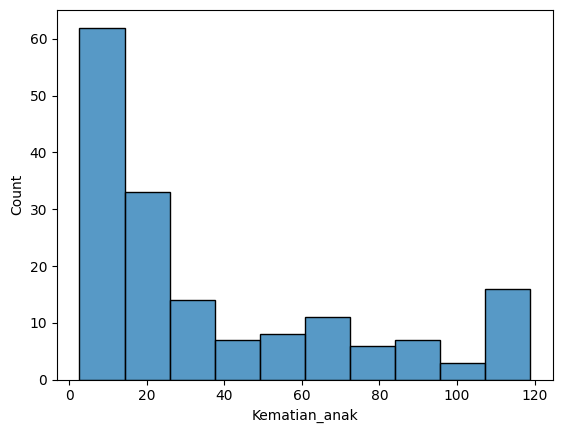

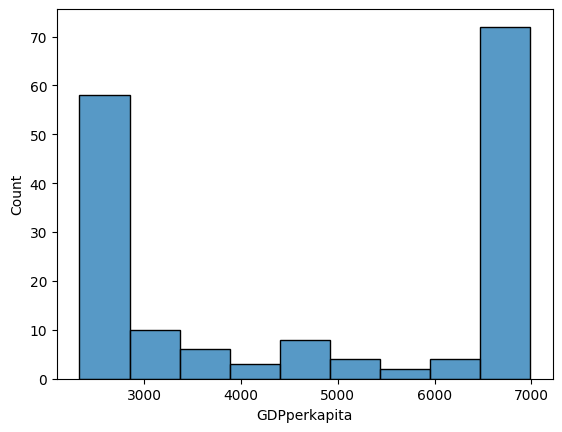

In [30]:
# plot histogram of 'Kematian_anak' feature
# sns.histplot(df_2fitur['Kematian_anak'],  hue="Negara")
sns.histplot(data=df_2fitur, x="Kematian_anak", bins=10)
plt.show()

# plot histogram of 'GDPperkapita' feature
sns.histplot(df_2fitur['GDPperkapita'])
plt.show()


<Axes: xlabel='Kematian_anak', ylabel='GDPperkapita'>

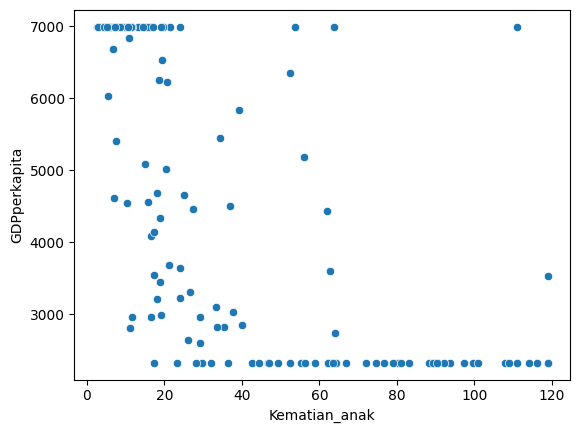

In [31]:
sns.scatterplot(x='Kematian_anak', y='GDPperkapita', data=df_2fitur)

---
---

## 3. Clustering
1. Scale the Data

In [32]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_2fitur_std = sc.fit_transform(df_2fitur.astype(float))
df_2fitur_std

array([[ 1.46282500e+00, -1.16669679e+00],
       [-5.58094860e-01, -3.27985444e-01],
       [-2.64292652e-01, -1.51665446e-01],
       [ 2.25164062e+00, -5.94848145e-01],
       [-7.31081207e-01,  1.05398211e+00],
       [-6.15756976e-01,  1.05398211e+00],
       [-5.16907635e-01, -7.42575711e-01],
       [-8.82101034e-01,  1.05398211e+00],
       [-8.95830109e-01,  1.05398211e+00],
       [ 6.24593369e-02,  5.05960494e-01],
       [-6.34977681e-01,  1.05398211e+00],
       [-7.77760062e-01,  1.05398211e+00],
       [ 3.42532470e-01, -1.16669679e+00],
       [-6.23994421e-01,  1.05398211e+00],
       [-8.62880328e-01,  5.96503196e-01],
       [-8.90338479e-01,  1.05398211e+00],
       [-4.97686929e-01, -2.08850310e-01],
       [ 2.03395453e+00, -1.16669679e+00],
       [ 1.58562863e-01, -1.16669679e+00],
       [ 2.65649649e-01, -1.16669679e+00],
       [-8.24438918e-01, -8.01843657e-02],
       [ 4.27652736e-01,  7.48996167e-01],
       [-4.70228779e-01,  1.05398211e+00],
       [-7.

2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

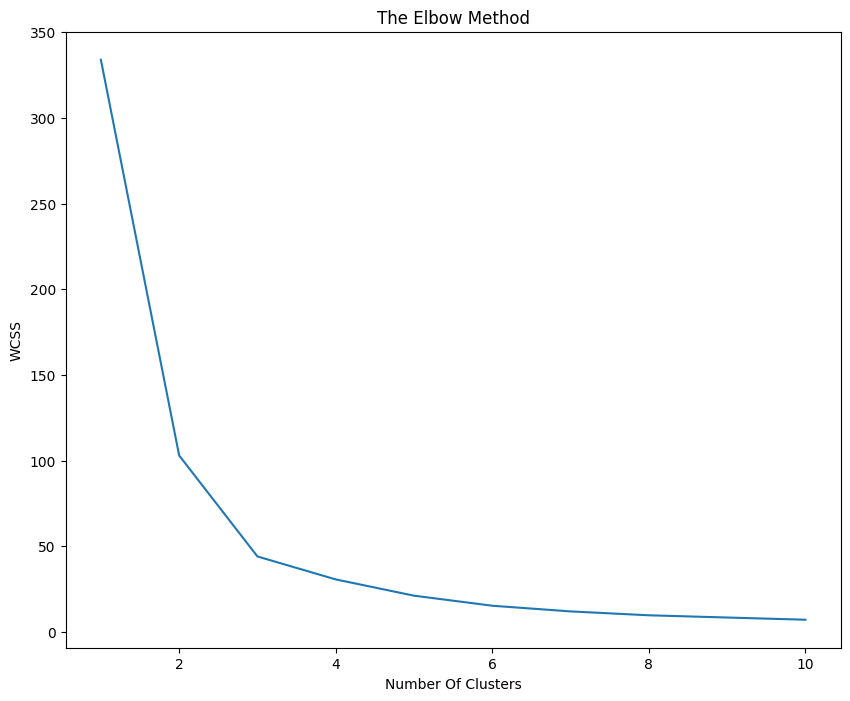

In [33]:
from sklearn.cluster import KMeans

plt.figure(figsize=(10,8))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(df_2fitur_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_2fitur_std)
labels1 = kmeans1.labels_
new_df_2fitur_std = pd.DataFrame(data = df_2fitur_std, columns=['Kematian_anak','GDPperkapita'])
new_df_2fitur_std['label_kmeans1'] = labels1

In [35]:
new_df_2fitur_std

,Kematian_anak,GDPperkapita,label_kmeans1
0,1.462825,-1.166697,0
1,-0.558095,-0.327985,1
2,-0.264293,-0.151665,1
3,2.251641,-0.594848,0
4,-0.731081,1.053982,1
...,...,...,...
162,-0.212122,-0.861711,0
163,-0.544366,1.053982,1
164,-0.374125,-1.166697,0
165,0.531994,-1.166697,0


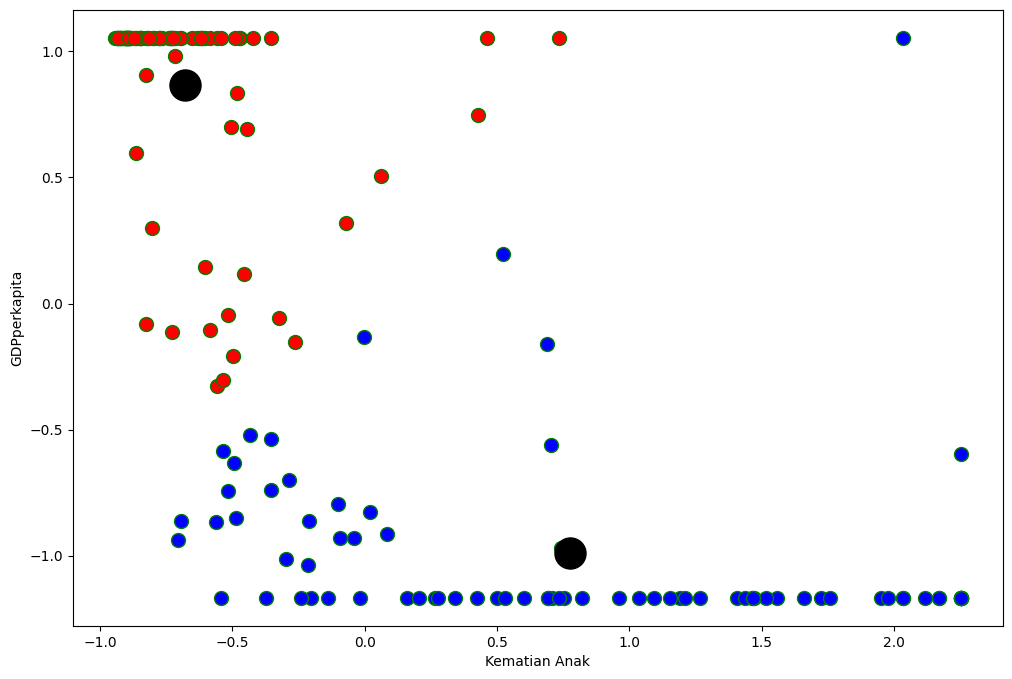

In [36]:
plt.figure(figsize=(12,8))

plt.scatter(new_df_2fitur_std.Kematian_anak[new_df_2fitur_std.label_kmeans1 == 0], new_df_2fitur_std['GDPperkapita'][new_df_2fitur_std.label_kmeans1 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_2fitur_std.Kematian_anak[new_df_2fitur_std.label_kmeans1 == 1], new_df_2fitur_std['GDPperkapita'][new_df_2fitur_std.label_kmeans1 == 1], c='red', s=100, edgecolor='green', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500);
plt.xlabel('Kematian Anak')
plt.ylabel('GDPperkapita')
plt.show()

In [37]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_2fitur_std)
labels2 = kmeans2.labels_
new_df_2fitur_std = pd.DataFrame(data = df_2fitur_std, columns=['Kematian_anak','GDPperkapita'])
new_df_2fitur_std['label_kmeans2'] = labels2

new_df_2fitur_std

,Kematian_anak,GDPperkapita,label_kmeans2
0,1.462825,-1.166697,0
1,-0.558095,-0.327985,2
2,-0.264293,-0.151665,2
3,2.251641,-0.594848,0
4,-0.731081,1.053982,1
...,...,...,...
162,-0.212122,-0.861711,2
163,-0.544366,1.053982,1
164,-0.374125,-1.166697,2
165,0.531994,-1.166697,2


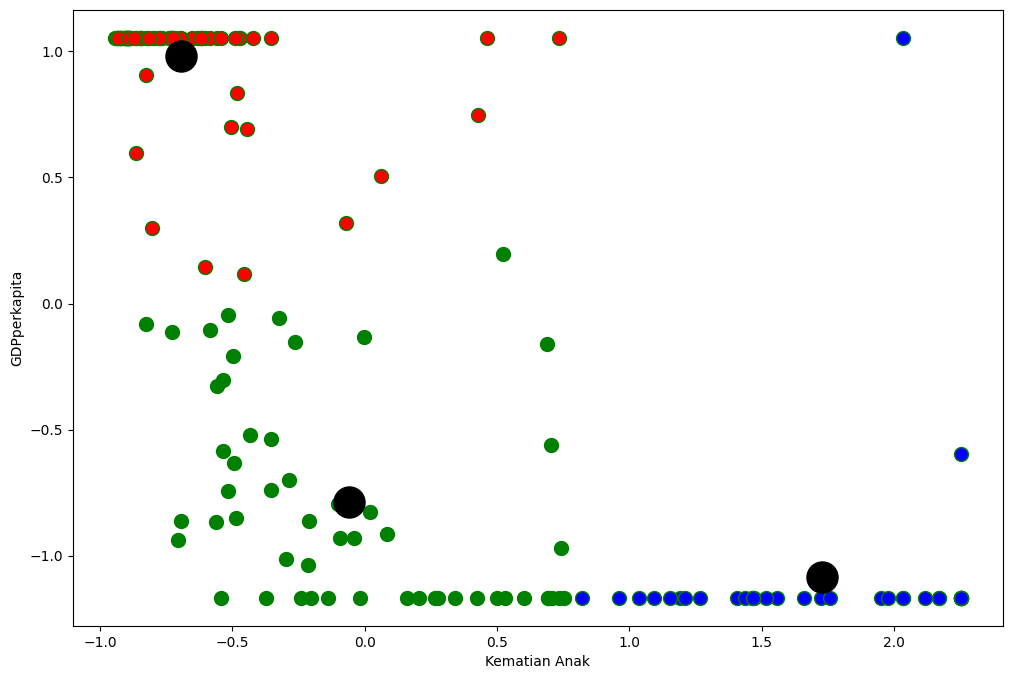

In [38]:
plt.figure(figsize=(12,8))

plt.scatter(new_df_2fitur_std.Kematian_anak[new_df_2fitur_std.label_kmeans2 == 0], new_df_2fitur_std['GDPperkapita'][new_df_2fitur_std.label_kmeans2 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_2fitur_std.Kematian_anak[new_df_2fitur_std.label_kmeans2 == 1], new_df_2fitur_std['GDPperkapita'][new_df_2fitur_std.label_kmeans2 == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_2fitur_std.Kematian_anak[new_df_2fitur_std.label_kmeans2 == 2], new_df_2fitur_std['GDPperkapita'][new_df_2fitur_std.label_kmeans2 == 2], c='green', s=100, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500);
plt.xlabel('Kematian Anak')
plt.ylabel('GDPperkapita')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

print("Model Label 1 : ", silhouette_score(df_2fitur_std, labels = labels1))
print("Model Label 2 : ", silhouette_score(df_2fitur_std, labels = labels2))

Model Label 1 :  0.6310896883024083
Model Label 2 :  0.6508936154378513


---
---

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

In [40]:
new_df_2fitur_std['Negara'] = df['Negara']
new_df_2fitur_std

,Kematian_anak,GDPperkapita,label_kmeans2,Negara
0,1.462825,-1.166697,0,Afghanistan
1,-0.558095,-0.327985,2,Albania
2,-0.264293,-0.151665,2,Algeria
3,2.251641,-0.594848,0,Angola
4,-0.731081,1.053982,1,Antigua and Barbuda
...,...,...,...,...
162,-0.212122,-0.861711,2,Vanuatu
163,-0.544366,1.053982,1,Venezuela
164,-0.374125,-1.166697,2,Vietnam
165,0.531994,-1.166697,2,Yemen


In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [42]:
from scipy.spatial import distance_matrix

centroids = new_df_2fitur_std.groupby('label_kmeans2')[['Kematian_anak', 'GDPperkapita']].mean()

distances = distance_matrix(new_df_2fitur_std[['Kematian_anak', 'GDPperkapita']], centroids)

new_df_2fitur_std['jarak_centroid'] = distances.min(axis=1)

result = new_df_2fitur_std.sort_values(by=['label_kmeans2', 'jarak_centroid'], ascending=True)
# print(result[['Negara', 'jarak_centroid', 'label_kmeans2']])
result


,Kematian_anak,GDPperkapita,label_kmeans2,Negara,jarak_centroid
87,1.723677,-1.166697,0,Lesotho,0.082177
106,1.759373,-1.166697,0,Mozambique,0.088519
99,1.660524,-1.166697,0,Mauritania,0.105264
26,1.556183,-1.166697,0,Burundi,0.188962
116,1.514995,-1.166697,0,Pakistan,0.226763
28,1.951580,-1.166697,0,Cameroon,0.239728
63,1.979038,-1.166697,0,Guinea,0.265691
94,1.471062,-1.166697,0,Malawi,0.268185
150,1.465571,-1.166697,0,Togo,0.273418
0,1.462825,-1.166697,0,Afghanistan,0.276039


In [43]:
result = result.reset_index(drop=True)
result.head()

,Kematian_anak,GDPperkapita,label_kmeans2,Negara,jarak_centroid
0,1.723677,-1.166697,0,Lesotho,0.082177
1,1.759373,-1.166697,0,Mozambique,0.088519
2,1.660524,-1.166697,0,Mauritania,0.105264
3,1.556183,-1.166697,0,Burundi,0.188962
4,1.514995,-1.166697,0,Pakistan,0.226763


In [44]:
result_negara = []

for i in range(len(result['Negara'])):
    if i <= 4:
        result_negara.append(result['Negara'][i])

result_str = ', '.join(result_negara)

print('Hasil rekomendasi negara yang akan mendapatkan bantuan: ' + result_str)


Hasil rekomendasi negara yang akan mendapatkan bantuan: Lesotho, Mozambique, Mauritania, Burundi, Pakistan
